Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

Updated: 2018/10/01

<hr style="height: 3px; background-color: #CCC;">
<h3>ferret</h3>

I wish to acknowledge use of the **ferret** and **pyferret** programs for analysis and graphics in this notebook.<br>
Ferret is a product of NOAA's Pacific Marine Environmental Laboratory.

Information is available at http://ferret.pmel.noaa.gov/Ferret/
    

<hr style="height: 3px; background-color: #CCC;">
<h3>Installation</h3>

Install ferret
    http://ferret.pmel.noaa.gov/Ferret/downloads/downloading_ferret
    
or

Install pyferret
    http://ferret.pmel.noaa.gov/Ferret/downloads/pyferret/

To use pyferret inside a notebook, please install the extension ferretmagic from https://github.com/PBrockmann/ipython_ferretmagic

    pip install ferretmagic
   
Other extension can be found from https://github.com/ipython/ipython/wiki/Extensions-Index

<hr style="height: 3px; background-color: #CCC;">
<h3>Classic start</h3>

Launch a ferret session by typing:

    $ ferret

You get a ferret prompt starting by:

    yes?

In a ferret sessions, the command history is available from up/down arrow keys.<br>
Remember also that **CTRL+a** goes to the beginning of the line and **CTR+e** to the end.

Note that ferret is not case sensitive


<hr style="height: 3px; background-color: #CCC;">
<h3>Minimal survivor kit</h3>

#### Commands
<div style="border:2px dotted black;">
<ul>
<li>Open a file: <b>use "/directory1/directory2/myFile.nc"</b>
<li>Close a file: <b>cancel data file</b>
<li>Close all files: <b>cancel data/all</b>
<li>List variables of open datasets: <b>show data</b> or more detailled <b>show data/full</b>
<li>2D plot as rectangular raster: <b>shade var2D</b>
<li>2D plot as contours: <b>contour var2D</b>
<li>1D plot: <b>plot var1D</b>
<li>List a variable: <b>list var</b>
<li>Basic statistic of a variable: <b>stat var</b>
<li>Append command on the same line: <b>cmd ; cmd ; cmd</b>
<li>Set a viewport: <b>set viewport xxx</b> (predefined are left,right,lower,upper,UL,UR,LL,LR)
</ul>
</div>

#### Common qualifiers

<div style="border:2px dotted black;">
<ul>
<li><b>/overlay</b> to overlay a plot over a first one (shade, contour, plot)
<li><b>/graticule=(dash)</b> to draw graticules as dashlines (shade, contour, plot)
<li><b>/fill</b> to fill up contours (contour)
<li><b>/lev=(-INF)(low,high,delta)(INF)</b> to specify levels (shade, contour)
<li><b>/palette=alpha</b> to specify a palette of colors, here alpha.spk (shade, contour)
<li><b>/hlimits=start:end</b> to limit horizontal scale (shade, contour, plot)
<li><b>/vlimits=start:end</b> to limit vertical scale (shade, contour, plot)
<li><b>/vs</b> to plot a variable against another one (plot)
<li><b>/title=/units=</b> when defining a variable with let
</ul>
</div>
        
#### Variables

<div style="border:2px dotted black;">
<ul>
<li>List variables of open datasets: <b>show data</b>
<li>Define a variable: <b>let var = ...</b>
<li>Define a conditionnal variable: <b>let var = if ... then ... else ...</b>
<li>List user defined variables: <b>show var</b>
<li>Cancel all user variables: <b>cancel var/all</b>
</ul>
</div>

<hr style="height: 3px; background-color: #CCC;">
<h3>The magic extension</h3>

This will let you call pyferret from your notebook and embed all output in it

In [1]:
%load_ext ferretmagic

Remember jupyter notebook shortcuts (https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/)

* CTRL+z to undo
* CTRL+y to redo

<hr style="height: 3px; background-color: #CCC;">
<h3>A first map</h3>

In [2]:
%%ferret

cancel data/all
use levitus_climatology
show data

currently SET data sets:
 1> /opt/ferret_dsets/data/levitus_climatology.cdf (default)
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...


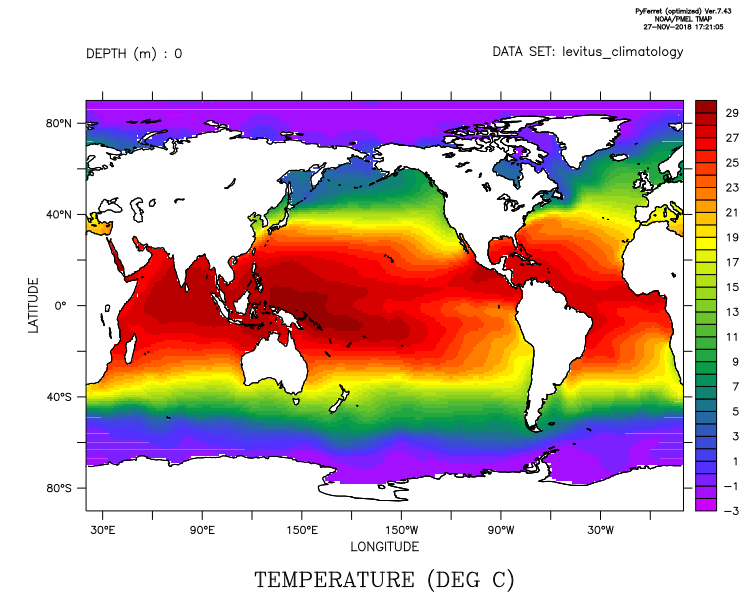

In [3]:
%%ferret -q

shade temp[k=1] ; go land

### Access to the help of the ferretmagic extension

In [4]:
%%ferret?

<hr style="height: 3px; background-color: #CCC;">
<h3>Plot a profile</h3>


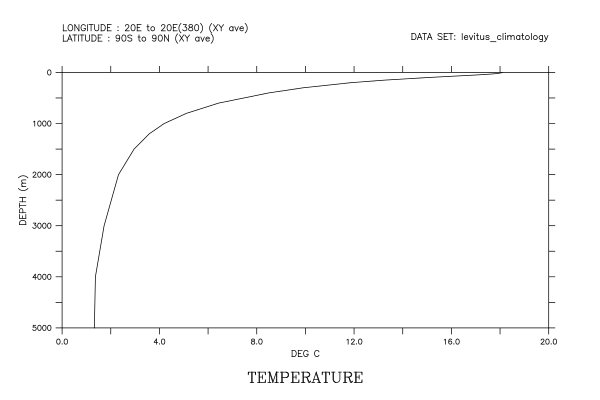

In [5]:
%%ferret -s 600,400

cancel mode logo
plot temp[x=@ave,y=@ave]

<hr style="height: 3px; background-color: #CCC;">
<h3>Transforms</h3>

In [6]:
%%ferret

show transforms

variable transforms e.g.SST[T=1-jan:15-mar@DDC]
 code description code description
 ---- ----------- ---- -----------
 @ITP interpolated @FAV ave-filled
 @AVE averaged @FLN linear-filled
 @VAR variance @FNR nearest-filled
 @SUM summed @NGD number of valid
 @RSU running sum @NBD number flagged bad
 @SHF shifted @LOC location
 @MIN minimum @WEQ weighted equal
 @MAX maximum @CDA closest dist above
 @DDC centered derivative @CDB closest dist below
 @DDF forward derivative @CIA closest index above
 @DDB backwards derivative @CIB closest index below
 @DIN integrated @EVN event mask
 @IIN indef. integ. @MED median smoothed
 @SBX box smoothed @SMX maximum smoothed
 @SBN binomial smoothed @SMN minimum smoothed
 @SWL Welch smoothed @STD standard deviation
 @SHN Hanning smoothed @WGT weights for avg,int
 @SPZ Parzen smoothed @SPX box smooth w/missing
 
regridding transforms e.g.SST[GX=x5deg@AVE]
 code description code description
 ---- ----------- ---- -----------
 @LIN lin. interp. @MODVAR modulo var
 @AVE area-wgtd avgd @MODNGD # gd mod pts
 @XACT exact match @MODNBD #bad mod pts
 @ASN index assn @MODSUM modulo sum
 @VAR variance @MODMIN modulo min
 @MIN minimum @MODMAX modulo max
 @MAX maximum @NRST nearst coord
 @SUM area-wgtd sum @BIN unwgtd avg
 @NGD #gd pts, area wgtd @NBIN #good in bin
 @MOD modulo ave @IIN #indef integral
 
auxiliary varible regridding transforms e.g.TEMP[GZ(depth)=zax@AVE]
 code description code description
 ---- ----------- ---- -----------
 @LIN lin. interp. @PLAVE pc-wise linear ave


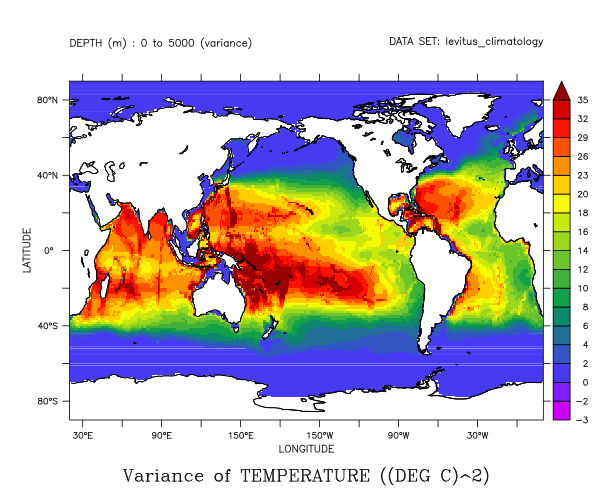

In [7]:
%%ferret -q -s 600,500

shade/lev=20v temp[k=@var] ; go land

<hr style="height: 3px; background-color: #CCC;">
<h3>Variable definition</h3>

In addition to all variables read from open datasets, you can define your own variables with the let command by typing for example:

    yes? let temp1 = temp - 273.15

It will defined a new variable temp1 but will only set the relation. No calcul is made at this time.

Define a recursive variable like

    yes? let temp = temp + 20.

has no sens in ferret.

You can of course combine variables from different datasets by specifying its dataset number [d=...]

    yes? let var1 = varA[d=1] + varB[d=2]

<hr style="height: 3px; background-color: #CCC;">
<h3>Conditionnal variables</h3>

You can define conditionnal variable with the following syntax:

    yes? let var3= if varA gt varB then varA else varC

The locigal condition can be gt, ge, eq, lt, le and several expressions can be combined using boolean operators (and, or). 

For example:
    
    yes? let tempselect = if (temp ge 10) and (temp lt 20) then 1
    yes? shade tempselect[k=1]

define a mask with the condition 10 <= temp < 20
 
or:

    yes? let saltselect = if temp gt 20 then salt
    yes? shade saltselect[k=1] ; go land

produces a map of salinity only for water warmer than 20 degrees.


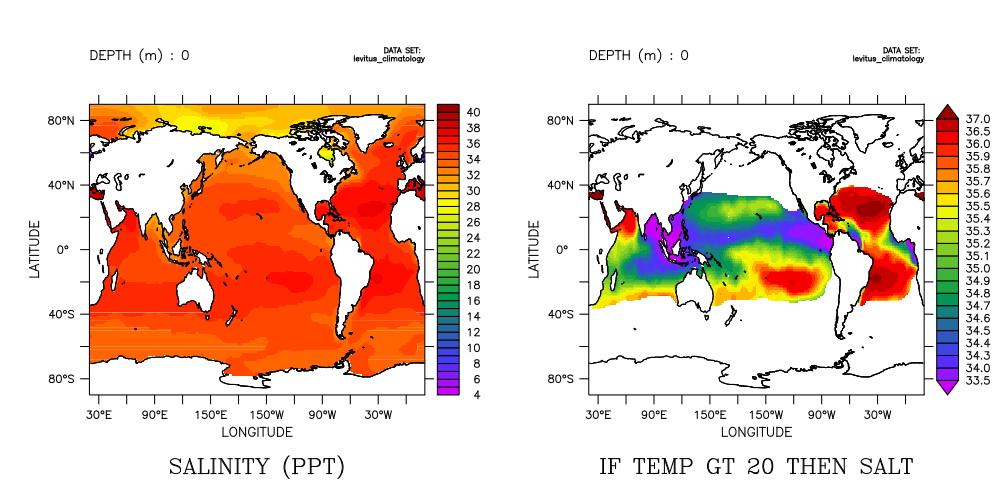

In [8]:
%%ferret -q -s 1000,500


set viewport left; shade salt[k=1] ; go land

let saltselect = if temp gt 20 then salt
set viewport right; shade/lev=20v saltselect[k=1] ; go land


<hr style="height: 3px; background-color: #CCC;">
<h3>Domain selection</h3>

You may want to work only on a sub-domain of a variable. For this you can define limits on the different dimensions of the variable by using the syntax

* X= ,Y=, Z=, T=, E=, F=

or with indices notations 

* I=, J=, K=, L=, M=, N=

Using this:

    yes? shade salt[X=30:120, Y=-40:30, K=1] ; go land

will plot a map centered on the Indian Ocean (longitudes from 30° to 120° degrees East and latitudes from 40° South to 30° North).


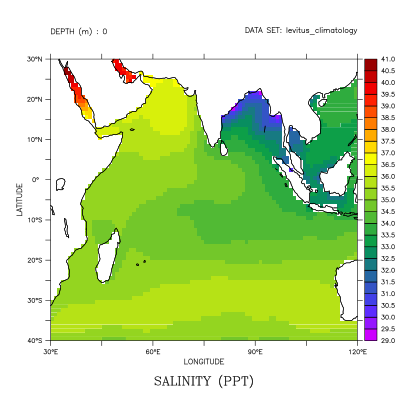

In [9]:
%%ferret -q -s 400,400

shade salt[X=30:120, Y=-40:30, K=1] ; go land

We reduce the X axis and let free the vertical axis to get a slice of the Indian Ocean.


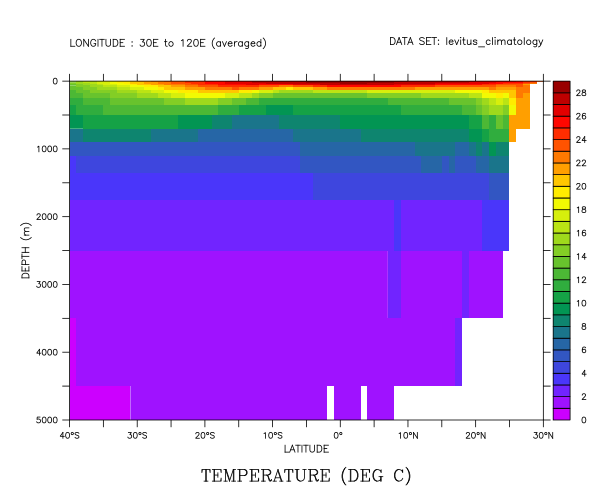

In [10]:
%%ferret -q -s 600,500

shade temp[X=30:120@AVE, Y=-40:30]

You can apply transformation to any of the dimensions of the variable and reduce it to a single scalar.

VARIABLE : SALINITY (PPT)
 FILENAME : levitus_climatology.cdf
 FILEPATH : /opt/ferret_dsets/data/
 LONGITUDE: 30E to 120E (XY ave)
 LATITUDE : 40S to 30N (XY ave)
 DEPTH (m): 0 to 5000 (maximum)
 35.28


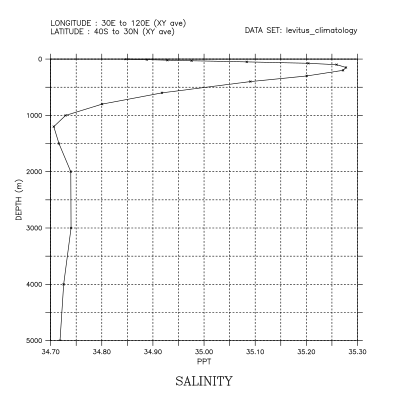

In [11]:
%%ferret -s 400,400

plot/grat=(dash)/line/symbol salt[X=30:120@ave, Y=-40:30@ave]

list salt[X=30:120@ave, Y=-40:30@ave, Z=@max]

Selections on physical axis are expressed in the units of the axis (express time with DD-MMM-YYYY format).
East longitudes and North latitudes are defined to be positive.

Note that transformations are sequentially applied from X to N axis except for the @AVE transformation that is applied simultaneously on X and Y.

     salt[X=30:120@ave, Y=-40:30@ave, Z=@max]
     
represents well the maximum of the average and not the average of the maximum.


The following plot represents the wind module from 1985 to 1989 years. Overlaid the same field smoothed with a running mean over 12 time steps.


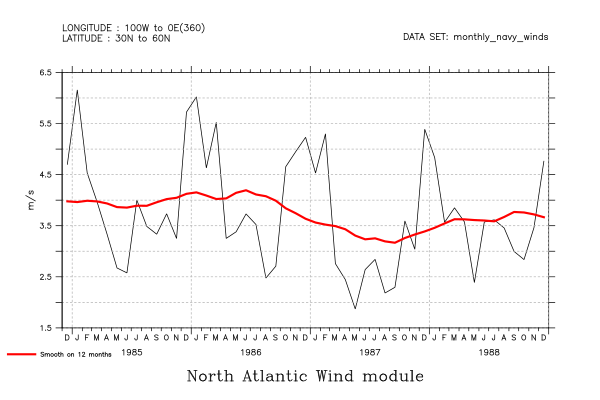

In [12]:
%%ferret -s 600,400

cancel data/all
use monthly_navy_winds.cdf

ppl color 6, 70, 70, 70

let/title="wind module"/units="m/s" module=(UWND^2+VWND^2)^0.5
let/title="North Atlantic Wind module"/units="m/s" module_AN=module[x=260:360@ave,y=30:60@ave]
plot/grat=(dash, color=6) module_AN[t="01-JAN-1985":"01-JAN-1989"]
plot/over/thick=3/title="Smooth on 12 months" module_AN[t="01-JAN-1985":"01-JAN-1989"@SBX:12]

<hr style="height: 3px; background-color: #CCC;">
<h3>Definition strategy</h3>

The definitions of the variables should as generic as possible, ie without domain specification. It is only when the plot or calculation commands are used that the limits must be specified. Do not hesitate to multiply the number of variable definitions, from the most general to the most limited and also for the sake of clarity.

In the same idea, operations on variables can only be done if the variables are compatible in dimension. Adding a vector defined on a longitude (X) to a vector defined on time (T) will have no meaning.

Note that you can specify a domain as a qualifier of a command to avoid repetitions inside variables. So

    yes? plot varA[i=20:40,d=1], varB[i=20:40,d=1], varC[i=20:40,d=2]

could be written

    yes? plot/i=20:40 varA[d=1], varB[d=1], varC[d=2]

<hr style="height: 3px; background-color: #CCC;">
<h3>Interpolation on domain</h3>

The transformation @ITP provides the same functionality as MODE INTERPOLATE with a greater level of control.


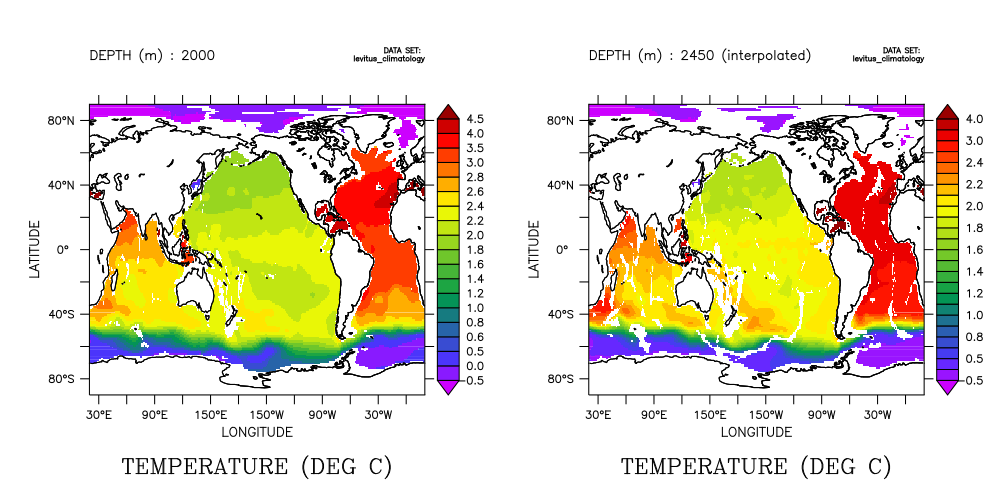

In [13]:
%%ferret -q -s 1000,500

cancel data/all
use levitus_climatology

set viewport left; shade/lev=20v temp[z=2450] ; go land
! use of the @itp to interpolate between layer (by default ferret will select the nearest layer)
set viewport right; shade/lev=20v temp[z=2450@itp] ; go land

<hr style="height: 3px; background-color: #CCC;">
<h3>Grid</h3>

Grid is the structure that hosts the data values. The grid is composed of axis.
You can access to the underlaying grid of a variable by typing:

        yes? show grid temp
        yes? show grid/z temp


In [14]:
%%ferret

show grid/z temp

GRID GMS1
 name axis # pts start end subset
 XAXLEVITR LONGITUDE 360mr 20.5E 19.5E(379.5) full
 YAXLEVITR LATITUDE 180 r 89.5S 89.5N full
 ZAXLEVITR DEPTH (m) 20 i- 0 5000 full
 normal T
 
 K Z ZBOX ZBOXLO
 1> 0 5 0
 2> 10 10 5
 3> 20 10 15
 4> 30 15 25
 5> 50 22.5 40
 6> 75 25 62.5
 7> 100 37.5 87.5
 8> 150 50 125
 9> 200 75 175
 10> 300 100 250
 11> 400 150 350
 12> 600 200 500
 13> 800 200 700
 14> 1000 200 900
 15> 1200 250 1100
 16> 1500 400 1350
 17> 2000 750 1750
 18> 3000 1000 2500
 19> 4000 1000 3500
 20> 5000 500 4500

<hr style="height: 3px; background-color: #CCC;">
<h3>Dynamic regridding</h3>

You can do dynamic regridding to pass from one axis to another one. This is a very powerfull feature of ferret and you should read the official documentation to better understand those capacities (http://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/Grids-Regions/GRIDS#Chapter4-Regridding).

Let's make a very simple example. Imagine you would like to regrid the previons temp variable over a new vertical axis, regulary spaced.

In [15]:
%%ferret

def axis/z=0:5000:200/edges/units="meters" myNewZaxis
show axis/z myNewZaxis

let newTemp = temp[gz=myNewZaxis]                  ! @lin is applied by default
show grid newTemp

name axis # pts start end
 MYNEWZAXIS Z (METERS) 25 r 100 4900
 Axis span (to cell edges) = 5000
 
 K Z ZBOX ZBOXLO
 1> 100 200 0
 2> 300 200 200
 3> 500 200 400
 4> 700 200 600
 5> 900 200 800
 6> 1100 200 1000
 7> 1300 200 1200
 8> 1500 200 1400
 9> 1700 200 1600
 10> 1900 200 1800
 11> 2100 200 2000
 12> 2300 200 2200
 13> 2500 200 2400
 14> 2700 200 2600
 15> 2900 200 2800
 16> 3100 200 3000
 17> 3300 200 3200
 18> 3500 200 3400
 19> 3700 200 3600
 20> 3900 200 3800
 21> 4100 200 4000
 22> 4300 200 4200
 23> 4500 200 4400
 24> 4700 200 4600
 25> 4900 200 4800
 GRID (G004)
 name axis # pts start end subset
 XAXLEVITR LONGITUDE 360mr 20.5E 19.5E(379.5) full
 YAXLEVITR LATITUDE 180 r 89.5S 89.5N full
 MYNEWZAXIS Z (METERS) 25 r 100 4900 full
 normal T

Now let make a time regredding to pass from a monthly variable to a yearly variable (read http://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/Grids-Regions/GRIDS#_VPID_199)

The @AVE—averaging should be used here by typing:

    let uwndYearly = uwnd[gt=yearsAxis@ave]

Computes the length-weighted average of all points on the source grid that lie partly or completely within each grid cell of the destination grid. If any portion of a source grid cell containing data overlaps a given destination grid cell, then data from that source cell contributes to the destination cell, weighted by the fraction of the destination cell overlapped by the source cell. The source data are treated as continuous, extending to the edges of the grid cells.

See the difference with other regriddings based on @lin or @nrst

GRID GDN1
 name axis # pts start end subset
 FNOCX LONGITUDE 144mr 20E 17.5E(377.5) full
 FNOCY LATITUDE 73 r 90S 90N full
 normal Z
 TIME TIME 132 r 16-JAN-1982 20:00 17-DEC-1992 03:30 full
 name axis # pts start end
 YEARSAXIS TIME 11 r 02-JUL-1982 14:54 02-JUL-1992 01:06
T0 = 15-JAN-1901
 Axis span (to cell edges) = 11


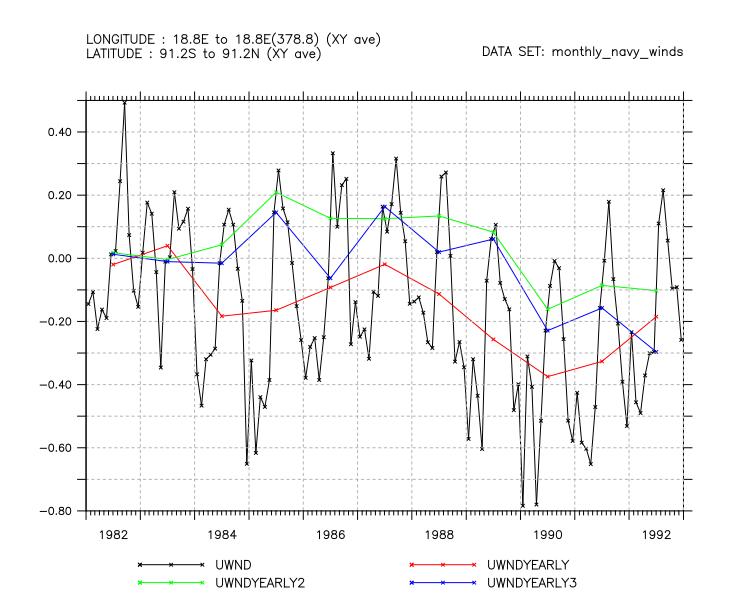

In [16]:
%%ferret

ppl color 6, 70,70,70

cancel data/all
use monthly_navy_winds

show grid uwnd

def axis/t="01-JAN-1982":"31-DEC-1992":1/edges/units=year yearsAxis
show axis yearsAxis

let uwndYearly = uwnd[gt=yearsAxis@ave]
let uwndYearly2 = uwnd[gt=yearsAxis@lin]
let uwndYearly3 = uwnd[gt=yearsAxis@nrst]
plot/grat=(dash, color=6)/line/symb uwnd[i=@ave,j=@ave], uwndYearly[i=@ave,j=@ave], uwndYearly2[i=@ave,j=@ave], uwndYearly3[i=@ave,j=@ave]

Let's go further and compute the 12-month climatology from the initial monthly variable


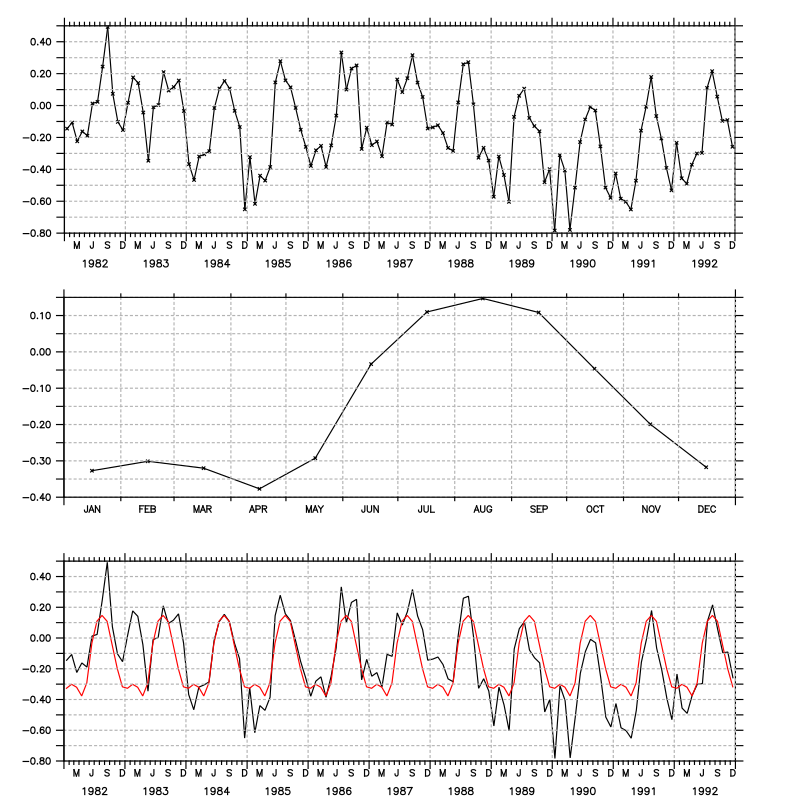

In [17]:
%%ferret -q -s 800,800

ppl color 6, 70,70,70

cancel data/all
use monthly_navy_winds

let uwnd_clim = uwnd[gt=month_reg@mod]

def viewport/x=0:1/y=0.66:1 third1; set viewport third1
go margins 0.4 0.6 1 1          ! reduce the margins
plot/nolab/grat=(dash, color=6)/line/symb uwnd[i=@ave,j=@ave]

def viewport/x=0:1/y=0.33:0.66 third2; set viewport third2
go margins 0.4 0.6 1 1
plot/nolab/grat=(dash, color=6)/line/symb uwnd_clim[i=@ave,j=@ave]

def viewport/x=0:1/y=0:0.33 third3; set viewport third3
go margins 0.4 0.6 1 1
plot/nolab/grat=(dash, color=6)/T="01-JAN-1982":"31-DEC-1992" uwnd[i=@ave,j=@ave], uwnd_clim[i=@ave,j=@ave]

Now plot the difference between climatology and the variable by filling in red when it is over 0 and in blue when lower.


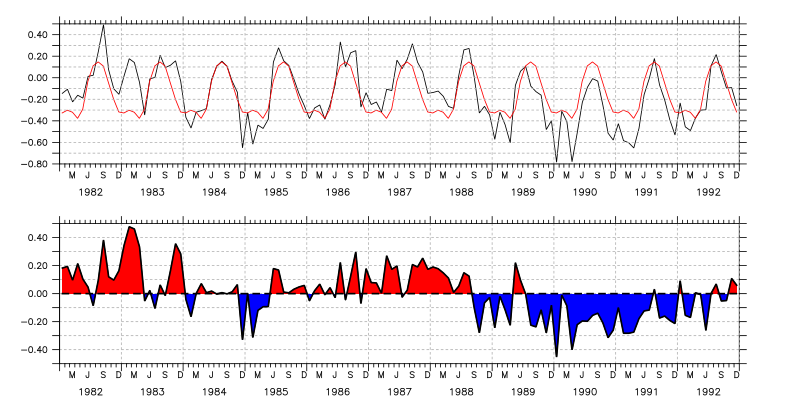

In [18]:
%%ferret -q -s 800,400

ppl color 6, 70,70,70

cancel data/all
use monthly_navy_winds

let uwnd_clim = uwnd[gt=month_reg@mod]

set viewport upper
go margins 0.4 0.6 1 1
plot/nolab/grat=(dash, color=6)/T="01-JAN-1982":"31-DEC-1992" uwnd[i=@ave,j=@ave], uwnd_clim[i=@ave,j=@ave]

set viewport lower
go margins 0.4 0.6 1 1

let a0 =  uwnd[i=@ave,j=@ave]-uwnd_clim[i=@ave,j=@ave,T="01-JAN-1982":"31-DEC-1992"]

! regrid on a fine grid to have fills nicely done
def axis/t="01-JAN-1982":"31-DEC-1992":1/edges/units=days timeDays
let a = a0[gt=timeDays]

let a_pos =  if a ge 0 then a else 0
let a_neg =  if a le 0 then a else 0
plot/nolab/grat=(dash, color=6) a

go fill_between poly/nolab/over/palette=red a_pos timeDays
go fill_between poly/nolab/over/palette=blue a_neg timeDays

plot/nolab/over/line/color=1/thick=2 a
plot/nolab/over/line/color=1/dash=(0.1,0.1,0.1,0.1)/thick=2 a*0

!frame/file=fill_between.pdf

<hr style="height: 3px; background-color: #CCC;">
<h3>Missing values</h3>

ferret takes care of missing values.

This can be seen with the stat command

In [19]:
%%ferret 

stat uwnd

ZONAL WIND
 LONGITUDE: 18.8E to 18.8E(378.8)
 LATITUDE: 91.2S to 91.2N
 Z: N/A
 TIME: 01-JAN-1982 14:45 to 01-JAN-1993 08:45
 E: N/A
 F: N/A
 DATA SET: /opt/ferret_dsets/data/monthly_navy_winds.cdf
 
 Total # of data points: 1387584 (144*73*1*132*1*1)
 # flagged as bad data: 0
 Minimum value: -25.548
 Maximum value: 18.545
 Mean value: 0.026499 (unweighted average)
 Standard deviation: 4.4884

You can replace missing values from the nearest point by using the @FNR (pour fill nearest) or more simply replace them by a choosen value. 

In [20]:
%%ferret 
let a={23,45,,12,90}
list a, missing(a,0)

X: 0.5 to 5.5
 Column 1: A is {23,45,,12,90}
 Column 2: EX#2 is MISSING(A,0)
 A EX#2
1 / 1: 23.00 23.00
2 / 2: 45.00 45.00
3 / 3: .... 0.00
4 / 4: 12.00 12.00
5 / 5: 90.00 90.00

<hr style="height: 3px; background-color: #CCC;">
<h3>Save image in file</h3>

You can save the display as png or pdf by typing the frame command

    yes? shade temp[k=@min] ; go land
    yes? frame/file=myImage.png
    yes? frame/file=myImage.pdf
    
Note that png format is available only with pyferret (and with ferretmagic), use gif format when using ferret.

<hr style="height: 3px; background-color: #CCC;">
<h3>Locate palettes, scripts</h3>

Please choose carefully your levels and palette to focus on what you want to highlight.

You can locate a predefined palette by typing:

    $ Fpalette red

An interesting proposition have been made to give up the rainbow palette (the default in ferret) by remplacing it by more appropriate ones to better represent your data, easier to read by those with colorblindness, and print well in grey scale. Please read https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html

    $ Fpalette div
    
to look to divergente palette.

Visiting http://matplotlib.org/examples/color/colormaps_reference.html can help to choose the right one.


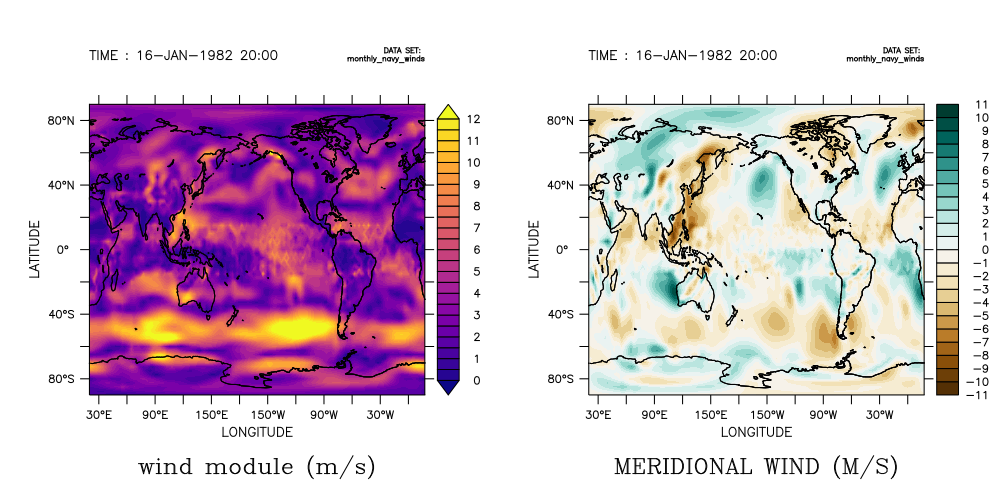

In [21]:
%%ferret -q -s 1000,500

cancel data/all
use monthly_navy_winds
let/title="wind module"/units="m/s" module=(UWND^2+VWND^2)^0.5

set viewport left
contour/fill/pal=mpl_PSU_plasma/lev=(-INF)(0,12,0.5)(INF) module[l=1] ; go land

set viewport right
! levels are specified using 20C = 20 levels centered
contour/fill/lev=20C/pal=mpl_Div_BrBG vwnd[l=1] ; go land

<hr style="height: 3px; background-color: #CCC;">
<h3>Control color lines</h3>


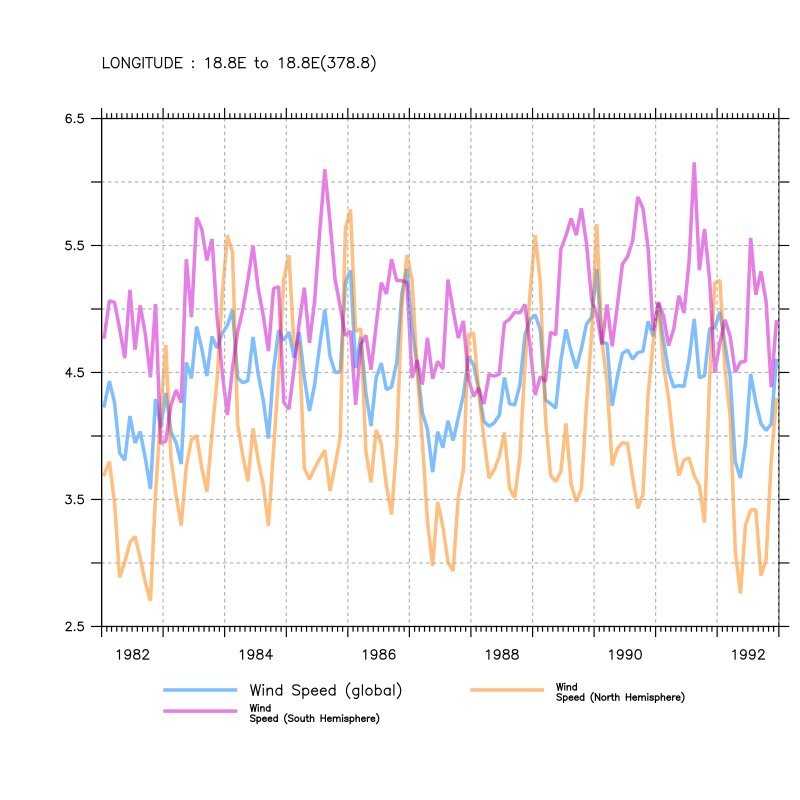

In [23]:
%%ferret -s 800,800

cancel mode logo

! increase the default number of colors (6)
set mode linecolors:20

cancel data/all

use monthly_navy_winds

! keep color black as 1
ppl color 2, 0, 50, 100, 50
ppl color 3, 100, 50, 0, 50
ppl color 4, 80, 0, 80, 50
ppl color 20, 70, 70, 70

! Define Wind Speed
let WND = (UWND^2 + VWND^2)^0.5

let/title="Wind Speed (global)" var1 = WND[i=@ave,j=@ave,d=1]
let/title="Wind Speed (North Hemisphere)" var2 = WND[i=@ave,y=0:90@ave,d=1]
let/title="Wind Speed (South Hemisphere)" var3 = WND[i=@ave,y=-90:0@ave,d=1]


! plot line(s) will be drawn starting with color 2
plot/color/thick=3/grat=(dash,color=20)/key=title var1, var2, var3


<hr style="height: 3px; background-color: #CCC;">
<h3>Scripting</h3>

ferret is a complete software that can perfeclty be used to build your own library of scripts.

Remember that with a classic ferret session, a journal is recorded with all your commands. This file named ferret.jnl, once cleaned from your different tries can be run by a simple: 

    yes? go monscript.jnl

You can also generalize the script by adding arguments. Read http://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/introduction/GO-FILES#Chapter1-Writing_GO_tools


Then pyferret could be used to run your script:

    $ pyferret -nodisplay -script monscript.jnl arg1 arg2

<hr style="height: 3px; background-color: #CCC;">
<h3>Ready ?</h3>

<img src="ferretBasicsImages/larson_01.jpg" width="300">